In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
from dateutil import parser

In [2]:
user_engagement = pd.read_csv('takehome_user_engagement.csv')
user_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [3]:
users=pd.read_excel('takehome_users.xlsx')
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1.0,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1.0,0.0,11.0,10803.0
1,2.0,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0.0,0.0,1.0,316.0
2,3.0,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0.0,0.0,94.0,1525.0
3,4.0,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0.0,0.0,1.0,5151.0
4,5.0,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0.0,0.0,193.0,5240.0


In [4]:
## SELECTING USERS WHO HAS LOGGED IN MORE THAN THREE TIMES ##
user_id_counts=user_engagement.user_id.value_counts()>=3

In [5]:
poss_adopted=[user_id for user_id in user_id_counts.index if user_id_counts[user_id]==True]
len(poss_adopted)


2248

In [6]:
## CREATING ADOPTED USER LIST WITH THE GIVEN CONDITION OF 3 LOGINS IN SEVEN DAY PERIOD ATLEAST ONCE## 
adopted_users = []
for user in poss_adopted:
    user_dates = user_engagement[user_engagement.user_id == user].time_stamp.tolist()
    user_dates = [parser.parse(date) for date in user_dates]
    a = user_dates[0:3]
    adopted = False
    b = 2
    while adopted == False:
        if ((a[-1] - a[0]).days <= 7):
            adopted = True
        else:
            try:
                b += 1
                a.pop(0)
                a.append(user_dates[b])
            except:
                break

    if adopted == True:
        adopted_users.append(user)

In [7]:
len(adopted_users)

1656

In [8]:
def adopted_function(x,y):
    if x in y:
        return True
    else:
        return False

In [9]:
## ADDING ADOPTED STATUS COLUMN TO THE DATASET ##
users['ADOPTED']=users['object_id'].apply(lambda x:adopted_function(x,adopted_users))
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,ADOPTED
0,1.0,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1.0,0.0,11.0,10803.0,False
1,2.0,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0.0,0.0,1.0,316.0,True
2,3.0,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0.0,0.0,94.0,1525.0,False
3,4.0,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0.0,0.0,1.0,5151.0,False
4,5.0,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0.0,0.0,193.0,5240.0,False


In [10]:
users['email_domain']=users['email'].apply(lambda x:x.split('@')[1])

In [11]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,ADOPTED,email_domain
0,1.0,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1.0,0.0,11.0,10803.0,False,yahoo.com
1,2.0,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0.0,0.0,1.0,316.0,True,gustr.com
2,3.0,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0.0,0.0,94.0,1525.0,False,gustr.com
3,4.0,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0.0,0.0,1.0,5151.0,False,yahoo.com
4,5.0,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0.0,0.0,193.0,5240.0,False,yahoo.com


In [12]:
common_mail=users.email_domain.value_counts()>5
common_mail=[email for email in common_mail.index  if common_mail[email]==True]

In [13]:
common_mail

['gmail.com',
 'yahoo.com',
 'jourrapide.com',
 'cuvox.de',
 'gustr.com',
 'hotmail.com']

In [14]:
def email_function(email):
    if email in common_mail:
        return email
    else:
        return 'other'
users['adjusted_email']=users['email_domain'].apply(lambda x:email_function(x))

In [15]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,ADOPTED,email_domain,adjusted_email
0,1.0,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1.0,0.0,11.0,10803.0,False,yahoo.com,yahoo.com
1,2.0,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0.0,0.0,1.0,316.0,True,gustr.com,gustr.com
2,3.0,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0.0,0.0,94.0,1525.0,False,gustr.com,gustr.com
3,4.0,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0.0,0.0,1.0,5151.0,False,yahoo.com,yahoo.com
4,5.0,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0.0,0.0,193.0,5240.0,False,yahoo.com,yahoo.com


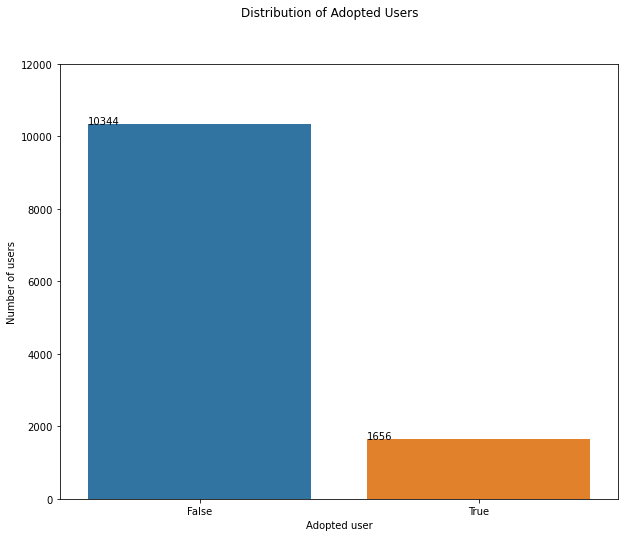

In [16]:
fig,ax1 = plt.subplots(figsize=(10, 8))

sns.countplot(x=users.ADOPTED, ax=ax1)
plt.suptitle('Distribution of Adopted Users')
ax1.set_ylabel('Number of users')
ax1.set_xlabel('Adopted user')
ax1.set_ylim(0,12000)
for p in ax1.patches:
    txt = str(p.get_height().round(2))
    txt_x = p.get_x()
    txt_y=p.get_height()
    
    ax1.text(txt_x,txt_y,txt)

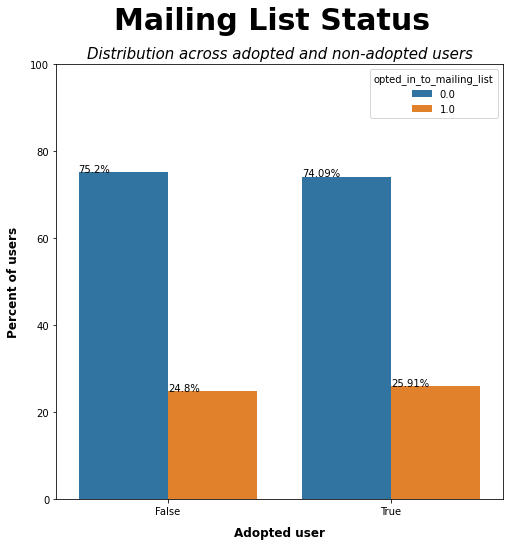

In [18]:
fig,ax1 = plt.subplots(figsize=(8, 8))

x, y = 'ADOPTED', 'opted_in_to_mailing_list'

# group df to properly show percentage
viz_df = (users
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index())

sns.barplot(x=x, y='percent', hue=y, data=viz_df, ax=ax1)

# set titles
ax1.set_ylim(0,100)
plt.suptitle('Mailing List Status', fontsize=30, y=0.98, fontweight='bold')
plt.title('Distribution of adopted and non-adopted users', fontsize=15, style='italic')
ax1.set_ylabel('Percentage of users', labelpad=10, fontsize=12, fontweight='bold')
ax1.set_xlabel('Adopted user', labelpad=10,fontsize=12, fontweight='bold')

for p in ax1.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    ax1.text(txt_x,txt_y,txt)

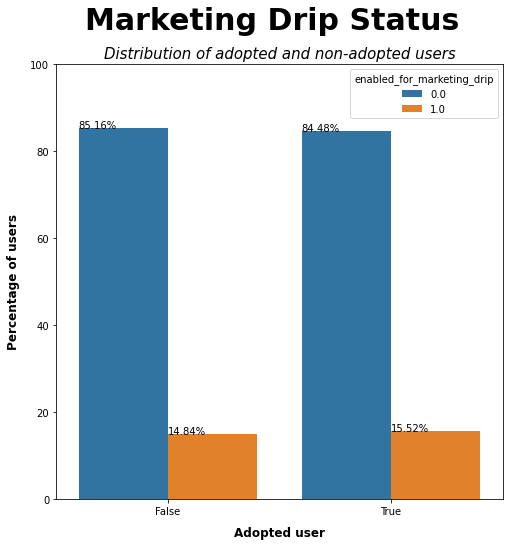

In [19]:
fig,ax1 = plt.subplots(figsize=(8, 8))

x, y = 'ADOPTED', 'enabled_for_marketing_drip'

# group df to properly show percentage
viz_df = (users
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index())

sns.barplot(x=x, y='percent', hue=y, data=viz_df, ax=ax1)

# set titles
ax1.set_ylim(0,100)
plt.suptitle('Marketing Drip Status', fontsize=30, y=0.98, fontweight='bold')
plt.title('Distribution of adopted and non-adopted users', fontsize=15, style='italic')
ax1.set_ylabel('Percentage of users', labelpad=10, fontsize=12, fontweight='bold')
ax1.set_xlabel('Adopted user', labelpad=10,fontsize=12, fontweight='bold')

for p in ax1.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    ax1.text(txt_x,txt_y,txt)

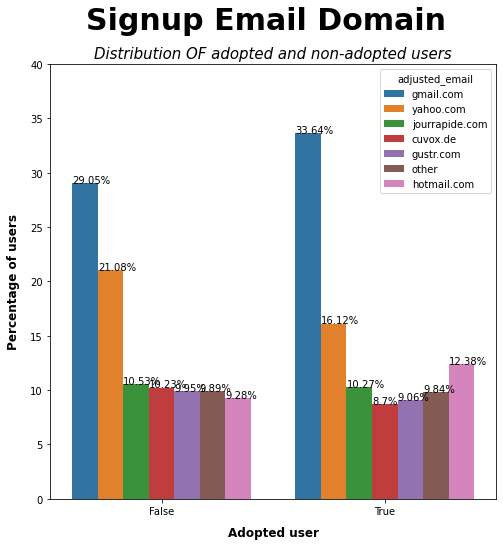

In [20]:
ig,ax1 = plt.subplots(figsize=(8, 8))

x, y = 'ADOPTED', 'adjusted_email'

# group df to properly show percentage
viz_df = (users
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index())

sns.barplot(x=x, y='percent', hue=y, data=viz_df, ax=ax1)

# set titles
ax1.set_ylim(0,40)
plt.suptitle('Signup Email Domain', fontsize=30, y=0.98, fontweight='bold')
plt.title('Distribution OF adopted and non-adopted users', fontsize=15, style='italic')
ax1.set_ylabel('Percentage of users', labelpad=10, fontsize=12, fontweight='bold')
ax1.set_xlabel('Adopted user', labelpad=10,fontsize=12, fontweight='bold')

for p in ax1.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    ax1.text(txt_x,txt_y,txt)

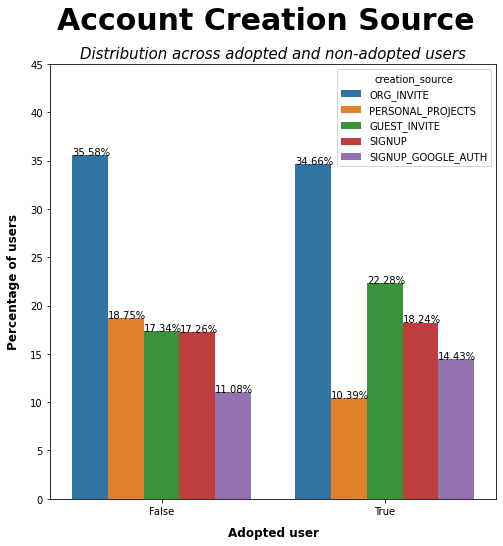

In [21]:
fig,ax1 = plt.subplots(figsize=(8, 8))

x, y = 'ADOPTED', 'creation_source'

# group df to properly show percentage
viz_df = (users
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index())

sns.barplot(x=x, y='percent', hue=y, data=viz_df, ax=ax1)

# set titles
ax1.set_ylim(0,45)
plt.suptitle('Account Creation Source', fontsize=30, y=0.98, fontweight='bold')
plt.title('Distribution across adopted and non-adopted users', fontsize=15, style='italic')
ax1.set_ylabel('Percentage of users', labelpad=10, fontsize=12, fontweight='bold')
ax1.set_xlabel('Adopted user', labelpad=10,fontsize=12, fontweight='bold')

for p in ax1.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    ax1.text(txt_x,txt_y,txt)

In [ ]:
## The data has been modified and correlations graphs between the features and the output has been plotted above.
## --> Since the output required  is  Discrete. I would start applying classification algorithirms to create a model.
## -->ADOPTED USER is my Output Column